<a href="https://colab.research.google.com/github/HiroTakeda/Notes/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nerual Network

+ Related topics: __regression__, __logistic regression__

Neural network is a universal function approximator. This note shows how to implement the __linear layer__ (also known as __dense layer__ or __fully connected layer__), one of the basic component of the neural network approach, and it is applicalble to both __regression__ and __logistic regression__ problems.


## 2-Layer Neural Network
![picture](https://drive.google.com/uc?id=1_p7BO63LIfo9X8K52RkCuZw68A6_MIZt)
### Feed-forward network functions

The 1st layer

$$
\begin{eqnarray}
a_1 &=& w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + \beta_1^{(1)}, \quad z_1 &=& h(a_1) \nonumber \\
a_2 &=& w_{21}^{(1)} x_1 + w_{22}^{(1)} x_2 + \beta_2^{(1)}, \quad z_2 &=& h(a_2) \nonumber
\end{eqnarray}
$$

The 2nd layer

$$
\begin{eqnarray}
b_1 &=& w_{11}^{(2)} z_1 + w_{12}^{(2)} z_2 + \beta_1^{(2)}, \quad y_1 &=& h(b_1) \nonumber \\
b_2 &=& w_{21}^{(2)} z_1 + w_{22}^{(2)} z_2 + \beta_2^{(2)}, \quad y_2 &=& h(b_2) \nonumber
\end{eqnarray}
$$




### Loss function

Given a set of training data $(\mathbf{x}, \mathbf{t})_n = ([x_1, x_2]^T, [t_1, t_2]^T)_n$ for $n=1,\cdots N$, we'd like to find the weights and bias values for each layer. Often, the number of samples ($N$) is very large, and the stochastic gradient descent method is more efficient than the gradient descent. Unlike the gradient descent method, the stochastic gradient descent method evaluates one sample at a time. Let's us one of the basic loss function, mean square error, here. For one sample, we have

$$
E = \displaystyle\frac{1}{2} (y_1 - t_1)^2 + \displaystyle\frac{1}{2} (y_2 - t_2)^2 = \displaystyle\frac{1}{2} \displaystyle\sum_{k} (y_k - t_k)^2
$$

### Stochastic gradient descent

The stochastic gradient descent method finds the weights and bias values by update iteratively using one sample at a time (a small set of samples are usually used):

$$
w_{ij}^{(\cdot)} \Leftarrow w_{ij}^{(\cdot)} + \eta \displaystyle\frac{\partial E}{\partial w_{ij}^{(\cdot)}}, \quad \beta_{i}^{(\cdot)} \Leftarrow \beta_{i}^{(\cdot)} + \eta \displaystyle\frac{\partial E}{\partial \beta_{i}^{(\cdot)}}
$$

where $\eta$ is a step size.

### Error backpropagation

The linear layers are cascaded, and the outputs of one layer are passed to the follwoing layer. To compute the gradients of weights and bias values, we can use the error backpropagation technique, in which the gradient of each weight can be computed by the chain rule.


---


The 2nd layer

$$
\begin{eqnarray}
\displaystyle\frac{\partial E}{\partial w_{11}^{(2)}} &=& \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial w_{11}^{(2)}} = \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial b_1} \displaystyle\frac{\partial b_1}{\partial w_{11}^{(2)}} = (y_1 - t_1) \, g(b_1) \, z_1 = \delta_1 \, g(b_1) \, z_1, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial w_{12}^{(2)}} &=& \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial w_{12}^{(2)}} = \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial b_1} \displaystyle\frac{\partial b_1}{\partial w_{12}^{(2)}} = (y_1 - t_1) \, g(b_1) \, z_2 = \delta_1 \, g(b_1) \, z_2, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial \beta_{1}^{(2)}} &=& \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial \beta_{1}^{(2)}} = \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial b_1} \displaystyle\frac{\partial b_1}{\partial \beta_{1}^{(2)}} = (y_1 - t_1) \, g(b_1) = \delta_1 \, g(b_1), \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial w_{21}^{(2)}} &=& \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial w_{21}^{(2)}} = \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial b_2} \displaystyle\frac{\partial b_2}{\partial w_{21}^{(2)}} = (y_2 - t_2) \, g(b_1) \, z_1 = \delta_2 \, g(b_1) \, z_1, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial w_{22}^{(2)}} &=& \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial w_{22}^{(2)}} = \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial b_2} \displaystyle\frac{\partial b_2}{\partial w_{22}^{(2)}} = (y_2 - t_2) \, g(b_1) \, z_2 = \delta_2 \, g(b_1) \, z_2, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial \beta_{2}^{(2)}} &=& \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial \beta_{2}^{(2)}} = \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial b_2} \displaystyle\frac{\partial b_2}{\partial \beta_{2}^{(2)}} = (y_2 - t_2) \, g(b_2) = \delta_2 \, g(b_2), \nonumber
\end{eqnarray}
$$

where $g(a) = \frac{\partial}{\partial a} h(a)$, for example when $h$ is the sigmoid function, $g(a) = h(a) (1 - h(a))$.



Therefore, we have

$$
\begin{bmatrix}
\displaystyle\frac{\partial E}{\partial w_{11}^{(2)}} & \displaystyle\frac{\partial E}{\partial w_{12}^{(2)}} \\
\displaystyle\frac{\partial E}{\partial w_{21}^{(2)}} & \displaystyle\frac{\partial E}{\partial w_{22}^{(2)}}
\end{bmatrix} = 
\begin{bmatrix}
\delta_1 g(b_1) z_1 & \delta_1 g(b_1) z_2 \\
\delta_2 g(b_2) z_1 & \delta_2 g(b_2) z_2
\end{bmatrix} = \left(
\begin{bmatrix}
g(b_1) \\
g(b_2)
\end{bmatrix} \odot
\begin{bmatrix}
\delta_1 \\
\delta_2
\end{bmatrix} \right)
\begin{bmatrix}
z_1 & z_2
\end{bmatrix},
$$

and

$$
\begin{bmatrix}
\displaystyle\frac{\partial E}{\partial \beta_{1}^{(2)}} \\
\displaystyle\frac{\partial E}{\partial \beta_{2}^{(2)}}
\end{bmatrix} = 
\begin{bmatrix}
\delta_1 g(b_1) \\
\delta_2 g(b_2)
\end{bmatrix} =
\begin{bmatrix}
g(b_1) \\
g(b_2)
\end{bmatrix} \odot
\begin{bmatrix}
\delta_1 \\
\delta_2
\end{bmatrix}
$$



---


The 1st layer

$$
\displaystyle\frac{\partial E}{\partial w_{11}^{(1)}} = \displaystyle\frac{\partial E}{\partial a_1} \displaystyle\frac{\partial a_1}{\partial w_{11}^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{11}^{(2)} + \delta_2\, g(b_2) \, w_{21}^{(2)} \right\} g(a_1)\, x_1
$$

where

$$
\begin{eqnarray}
\displaystyle\frac{\partial E}{\partial a_1} &=& \displaystyle\frac{\partial E}{\partial b_1} \displaystyle\frac{\partial b_1}{\partial a_1} + \displaystyle\frac{\partial E}{\partial b_2} \displaystyle\frac{\partial b_2}{\partial a_1} \nonumber \\
& & \nonumber \\
&=& \displaystyle\frac{\partial E}{\partial y_1} \displaystyle\frac{\partial y_1}{\partial b_1} \displaystyle\frac{\partial b_1}{\partial a_1} + \displaystyle\frac{\partial E}{\partial y_2} \displaystyle\frac{\partial y_2}{\partial b_2} \displaystyle\frac{\partial b_2}{\partial a_1} \nonumber \\
& & \nonumber \\
&=& \delta_1 \, g(b_1)\, \displaystyle\frac{\partial b_1}{\partial a_1} + \delta_2 \, g(b_2)\, \displaystyle\frac{\partial b_2}{\partial a_1} \nonumber
\end{eqnarray}
$$

and

$$
\begin{eqnarray}
\displaystyle\frac{\partial b_1}{\partial a_1} &=& \displaystyle\frac{\partial b_1}{\partial z_1} \displaystyle\frac{\partial z_1}{\partial a_1} + \displaystyle\frac{\partial b_1}{\partial z_2} \displaystyle\frac{\partial z_2}{\partial a_1} = w_{11}^{(2)} \, g(a_1) + w_{12}^{(2)} \cdot 0 = w_{11}^{(2)} \, g(a_1), \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial b_2}{\partial a_1} &=& \displaystyle\frac{\partial b_2}{\partial z_1} \displaystyle\frac{\partial z_1}{\partial a_1} + \displaystyle\frac{\partial b_2}{\partial z_2} \displaystyle\frac{\partial z_2}{\partial a_1} = w_{21}^{(2)} \, g(a_1) + w_{22}^{(2)} \cdot 0 = w_{21}^{(2)} \, g(a_1). \nonumber
\end{eqnarray}
$$

Similarly we have

$$
\begin{eqnarray}
\displaystyle\frac{\partial E}{\partial w_{11}^{(1)}} &=& \displaystyle\frac{\partial E}{\partial a_1} \displaystyle\frac{\partial a_1}{\partial w_{11}^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{11}^{(2)} + \delta_2\, g(b_2) \, w_{21}^{(2)} \right\} g(a_1)\, x_1, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial w_{12}^{(1)}} &=& \displaystyle\frac{\partial E}{\partial a_1} \displaystyle\frac{\partial a_1}{\partial w_{12}^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{11}^{(2)} + \delta_2\, g(b_2) \, w_{21}^{(2)} \right\} g(a_1)\, x_2, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial \beta_1^{(1)}} &=& \displaystyle\frac{\partial E}{\partial a_1} \displaystyle\frac{\partial a_1}{\partial \beta_1^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{11}^{(2)} + \delta_2\, g(b_2) \, w_{21}^{(2)} \right\} g(a_1), \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial w_{21}^{(1)}} &=& \displaystyle\frac{\partial E}{\partial a_2} \displaystyle\frac{\partial a_2}{\partial w_{21}^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{12}^{(2)} + \delta_2\, g(b_2) \, w_{22}^{(2)} \right\} g(a_2)\, x_1, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial w_{22}^{(1)}} &=& \displaystyle\frac{\partial E}{\partial a_2} \displaystyle\frac{\partial a_2}{\partial w_{22}^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{12}^{(2)} + \delta_2\, g(b_2) \, w_{22}^{(2)} \right\} g(a_2)\, x_2, \nonumber \\
& & \nonumber \\
\displaystyle\frac{\partial E}{\partial \beta_2^{(1)}} &=& \displaystyle\frac{\partial E}{\partial a_2} \displaystyle\frac{\partial a_2}{\partial \beta_2^{(1)}} = \left\{ \delta_1\, g(b_1) \, w_{12}^{(2)} + \delta_2\, g(b_2) \, w_{22}^{(2)} \right\} g(a_2). \nonumber
\end{eqnarray}
$$

Therefore we have them in matrix form as

$$
\begin{bmatrix}
\displaystyle\frac{\partial E}{\partial w_{11}^{(1)}} & \displaystyle\frac{\partial E}{\partial w_{12}^{(1)}} \\
\displaystyle\frac{\partial E}{\partial w_{21}^{(1)}} & \displaystyle\frac{\partial E}{\partial w_{22}^{(1)}}
\end{bmatrix} = \left\{
\begin{bmatrix}
g(a_1) \\
g(a_2)
\end{bmatrix} \odot \left(
\begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)}
\end{bmatrix}^T \left(
\begin{bmatrix}
g(b_1) \\
g(b_2)
\end{bmatrix} \odot
\begin{bmatrix}
\delta_1 \\
\delta_2
\end{bmatrix}
\right)
\right) \right\}
\begin{bmatrix}
x_1 & x_2
\end{bmatrix},
$$

and

$$
\begin{bmatrix}
\displaystyle\frac{\partial E}{\partial \beta_{1}^{(1)}} \\
\displaystyle\frac{\partial E}{\partial \beta_{2}^{(1)}}
\end{bmatrix} =
\begin{bmatrix}
g(a_1) \\
g(a_2)
\end{bmatrix} \odot \left(
\begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)}
\end{bmatrix}^T \left(
\begin{bmatrix}
g(b_1) \\
g(b_2)
\end{bmatrix} \odot
\begin{bmatrix}
\delta_1 \\
\delta_2
\end{bmatrix}
\right)
\right).
$$

### Summary
The block diagram below shows the 2-layer NN model:

![picture](https://drive.google.com/uc?id=1AwIPuB8oXdvAR5QpYrmGGVgzK-lqEgRg)

Based on the calculations above, the error backpropagation can be depicted as below:

![picture](https://drive.google.com/uc?id=10jfdO5Fpl7AL0eN68TuHxI_HJqzo5kIN)

In general, we can implement the forward and backward process of the linear layer and the activation function as shown below.

![picture](https://drive.google.com/uc?id=1_pebZ2eQCXK4HGITByvdNcXoeytq0IDO)

It should be noted here that it is possible to concatenate as many layers as we want. However we will face the vanishing gradient problem. It is caused by the gradient update at the activation layer, $\boldsymbol{\delta} \Leftarrow g(\mathbf{a}) \odot \boldsymbol{\delta}$, where $0 \le g(\cdot) < 1.0$ if we use the sigmoid function. In order to avoid the problem, the __Rectified Linear Unit__ (ReLU) function (or other activation functions) and the __batch normalization__ technique are usually used.




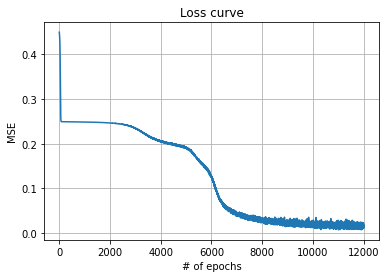

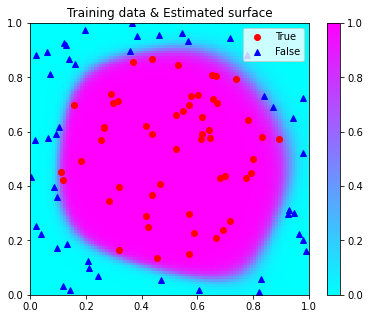

In [120]:
# An implementation from scratch for better understanding of the neural network method.
import numpy
import pylab

# linear layer
class linear:
  def __init__(self, in_channels, out_channels):
    self.W = numpy.random.randn(out_channels, in_channels) * 1
    #self.b = numpy.random.randn(out_channels, 1) * 0.01
    self.b = numpy.ones((out_channels, 1))
    
  def forward(self, z):
    self.z = z.copy() # keep it for the backward process
    a = numpy.matmul(self.W, z) + self.b
    return a

  def backward(self, delta):
    self.dW = numpy.matmul(delta, numpy.transpose(self.z))
    self.db = delta.copy()
    delta = numpy.matmul(numpy.transpose(self.W), delta)
    return delta

  def update(self, eta):
    self.W -= eta * self.dW
    self.b -= eta * self.db

# sigmoid layer
class sigmoid:
  def __init__(self):
    return

  def sig(self, a):
    z = 1 / (1 + numpy.exp(-a))
    return z

  def forward(self, a):
    self.a = a.copy() # keep it for the backward process
    z = self.sig(a)
    return z
  
  def backward(self, delta):
    g = self.sig(self.a) * (1 - self.sig(self.a))
    delta *= g
    return delta

# Neural network model
class myNet:
  def __init__(self, in_channels, out_channels, num_features):
    self.linear_1 = linear(in_channels, num_features)
    self.sigmoid_1 = sigmoid()
    self.linear_2 = linear(num_features, num_features)
    self.sigmoid_2 = sigmoid()
    self.linear_3 = linear(num_features, num_features)
    self.sigmoid_3 = sigmoid()
    self.linear_4 = linear(num_features, out_channels)
    self.sigmoid_4 = sigmoid()
  
  def forward(self, x):
    x = self.linear_1.forward(x)
    x = self.sigmoid_1.forward(x)
    x = self.linear_2.forward(x)
    x = self.sigmoid_2.forward(x)
    x = self.linear_3.forward(x)
    x = self.sigmoid_3.forward(x)
    x = self.linear_4.forward(x)
    x = self.sigmoid_4.forward(x)
    return x

  def backward(self, delta):
    delta = self.sigmoid_4.backward(delta)
    delta = self.linear_4.backward(delta)
    delta = self.sigmoid_3.backward(delta)
    delta = self.linear_3.backward(delta)
    delta = self.sigmoid_2.backward(delta)
    delta = self.linear_2.backward(delta)
    delta = self.sigmoid_1.backward(delta)
    delta = self.linear_1.backward(delta)

  def update(self, eta):
    self.linear_1.update(eta)
    self.linear_2.update(eta)
    self.linear_3.update(eta)
    self.linear_4.update(eta)


def train(model, x, t, eta):
  # training loss
  loss = 0

  # shuffle the training data
  indices = numpy.random.permutation(x.shape[1])

  # stochastic gradient descent
  for i in indices:
    # train with one sample at a time
    x_sample = x[:,i].reshape((x.shape[0], 1)).copy()
    t_sample  = t[i].reshape((1,1)).copy()

    # data augmentation
    x_sample += numpy.random.randn(x_sample.size).reshape(x_sample.shape) * 0.01
    
    # feed forward
    y = model.forward(x_sample)

    # error
    delta = y - t_sample

    # training loss
    loss += numpy.sum(delta**2)

    # error backpropagation
    model.backward(delta)

    # update
    model.update(eta)
    
  return loss / x.shape[1]

def main():

  numpy.random.seed(0)

  # parameters
  num_samples = 100
  in_channels = 2
  out_channels = 1
  num_features = 4
  epoch = 12000
  eta = 0.01

  # training data
  x = numpy.random.rand(in_channels, num_samples)
  t = numpy.zeros(num_samples)
  for i in range(num_samples):
    if numpy.sqrt((x[0,i] - 0.5)**2 + (x[1,i] - 0.5)**2) < 0.4:
      t[i] = 1.0

  # create a neural network model
  model = myNet(in_channels, out_channels, num_features)

  # training
  loss = numpy.zeros(epoch)
  for i in range(epoch):
    loss[i] = train(model, x, t, eta)

  # plot the loss curve
  pylab.plot(numpy.arange(epoch), loss)
  pylab.grid()
  pylab.title('Loss curve')
  pylab.xlabel('# of epochs')
  pylab.ylabel('MSE')
  pylab.show()
  
  # plot the estimated surface
  b, a = numpy.meshgrid(numpy.linspace(0, 1, 101), numpy.linspace(0, 1, 101))
  c = numpy.zeros(a.shape)
  for i in range(a.shape[0]):
    for j in range(a.shape[1]):
      x_sample = numpy.array((a[i,j], b[i,j])).reshape((2,1))
      c[i,j] = model.forward(x_sample)
  c = c[:-1, :-1]
  l_a=a.min()
  r_a=a.max()
  l_b=b.min()
  r_b=b.max()
  figure, axes = pylab.subplots(figsize=(6.25,5))
  c = axes.pcolormesh(a, b, c, cmap='cool', vmin=0.0, vmax=1.0)
  axes.set_title('Training data & Estimated surface')
  axes.axis([l_a, r_a, l_b, r_b])
  figure.colorbar(c)
  pylab.plot(x[0,t==1], x[1,t==1], 'ro', label='True')
  pylab.plot(x[0,t==0], x[1,t==0], 'b^', label='False')
  pylab.legend()
  pylab.show()


if __name__ == '__main__':
  main()